In [144]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import svm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
# Read the file into a pandas data frame - 5 points
df = pd.read_csv('adult.csv',na_values='?')
print(df.shape)

(32561, 15)


In [146]:
# Drop columns that have missing values - 5 points
df1 = df.dropna()
df1 = df1.drop(['native.country'], axis=1)
df1 = df1.drop(['education'], axis=1)
df1 = df1.drop(['fnlwgt'], axis=1)
print(df1.shape)

(30162, 12)


# Supervised Analysis

## Logistic Regression with Lasso(L1) Regularization.

In [152]:
le = preprocessing.LabelEncoder()


le.fit(df1['workclass'])
le.transform(df1['workclass'])
df1.insert(1,'workclass_num',le.transform(df1['workclass']))
df1 = df1.drop(['workclass'], axis=1)

le.fit(df1['marital.status'])
le.transform(df1['marital.status'])
df1.insert(4,'marital.status_num',le.transform(df1['marital.status']))
df1 = df1.drop(['marital.status'], axis=1)

le.fit(df1['occupation'])
le.transform(df1['occupation'])
df1.insert(5,'occupation_num',le.transform(df1['occupation']))
df1 = df1.drop(['occupation'], axis=1)

le.fit(df1['relationship'])
le.transform(df1['relationship'])
df1.insert(6,'relationship_num',le.transform(df1['relationship']))
df1 = df1.drop(['relationship'], axis=1)

le.fit(df1['race'])
le.transform(df1['race'])
df1.insert(7,'race_num',le.transform(df1['race']))
df1 = df1.drop(['race'], axis=1)

le.fit(df1['sex'])
le.transform(df1['sex'])
df1.insert(8,'sex_num',le.transform(df1['sex']))
df1 = df1.drop(['sex'], axis=1)

le.fit(df1['income'])
df1['income_num'] = le.transform(df1['income'])
df1 = df1.drop(['income'], axis=1)

#Occupation vs income
X = df1.iloc[:,4:5]
Y = df1.iloc[:,-1]
display(X)
display(Y)

X_train = X[0:15081]
Y_train = Y[0:15081]
X_test = X[15081:]
Y_test = Y[15081:]


,occupation_num
1,3
3,6
4,9
5,7
6,0
7,9
8,9
10,9
11,9
12,7


1        0
3        0
4        0
5        0
6        0
7        1
8        0
10       1
11       1
12       1
13       1
15       1
16       1
17       1
19       1
20       1
21       0
22       0
23       0
25       0
26       0
27       0
28       1
29       1
30       1
31       1
32       1
33       1
34       1
35       1
        ..
32525    0
32526    0
32527    0
32529    0
32530    0
32531    0
32532    0
32535    1
32536    1
32537    0
32538    0
32539    1
32540    0
32542    0
32545    0
32546    0
32547    1
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    0
32555    1
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income_num, Length: 30162, dtype: int64

In [153]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = [] 

In [154]:
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []

In [155]:
# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []

In [156]:
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model 
# with different values of C.
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1 
    # means stronger regularization and large value means less regularization.
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga'

    logreg = linear_model.LogisticRegression(C=c,penalty='l1', warm_start=True, solver='saga')
    
    # Fit the model on the training set.
    logreg.fit(X_train, Y_train)
    
    # Find the prediction on training set.
    Yhat_train = logreg.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction on test set.
    Yhat_test = logreg.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg.append(c)

Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809


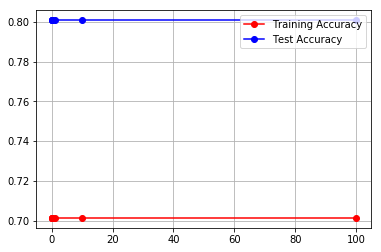

In [157]:
# Call the above function i.e. logreg_model with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

Accuracy on training data = 0.698296
Accuracy on test data = 0.798157


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.744314
Accuracy on test data = 0.806512


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.750613
Accuracy on test data = 0.803727


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.751343
Accuracy on test data = 0.802732


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.751475
Accuracy on test data = 0.802467


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.751409
Accuracy on test data = 0.802467
Accuracy on training data = 0.751343
Accuracy on test data = 0.802400


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


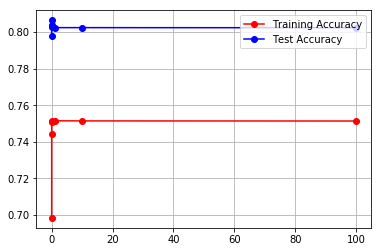

In [158]:
acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

#age, workclass, education.num, marital.status, occupation vs income
X = df1.iloc[:,0:5]
Y = df1.iloc[:,-1]
# display(X)
# display(Y)

X_train = X[0:15081]
Y_train = Y[0:15081]
X_test = X[15081:]
Y_test = Y[15081:]

for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.758239
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759565
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759764
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759764
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759764
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759764
Accuracy on test data = 0.800809
Accuracy on training data = 0.759764
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


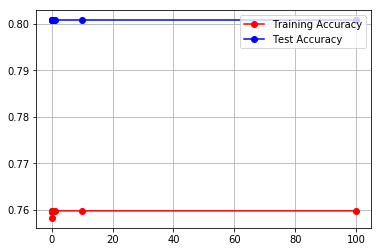

In [159]:
acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

#age, workclass, education.num, marital.status, occupation, relationship,race,sex,capital.gain,capital.loss,hours.per.week vs income
X = df1.iloc[:,0:11]
Y = df1.iloc[:,-1]
# display(X)
# display(Y)

X_train = X[0:15081]
Y_train = Y[0:15081]
X_test = X[15081:]
Y_test = Y[15081:]

for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Logistic Regression with Ridge(L2) Regularization.

In [160]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg2 = []

In [161]:
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg2 = []

In [162]:
# Initialize an empty list to store different values of parameter 'c'.
c_logreg2 = []

In [163]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.
    
    logreg2 = linear_model.LogisticRegression(C=c, warm_start=True)
    
    # Fit the model on the training set.
    logreg2.fit(X_train, Y_train)
    
    # Find the prediction on training set.
    Yhat_train = logreg2.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # Find the prediction and accuracy on test set.
    Yhat_test = logreg2.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg2.append(c)

/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

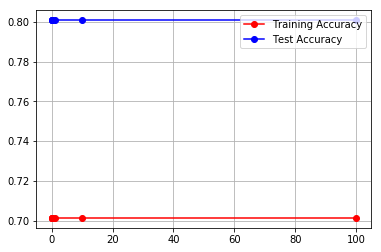

In [164]:
#Occupation vs income
acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

X = df1.iloc[:,4:5]
Y = df1.iloc[:,-1]
# display(X)
# display(Y)

X_train = X[0:15081]
Y_train = Y[0:15081]
X_test = X[15081:]
Y_test = Y[15081:]


for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

Accuracy on training data = 0.698760
Accuracy on test data = 0.798621


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.744314
Accuracy on test data = 0.806512


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.750746
Accuracy on test data = 0.803727


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.751276
Accuracy on test data = 0.802400


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.751475
Accuracy on test data = 0.802467


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.751144
Accuracy on test data = 0.802400
Accuracy on training data = 0.751542
Accuracy on test data = 0.802334


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


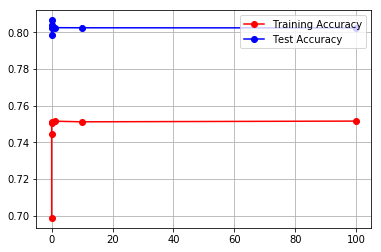

In [165]:
acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

#age, workclass, education.num, marital.status, occupation vs income
X = df1.iloc[:,0:5]
Y = df1.iloc[:,-1]
# display(X)
# display(Y)

X_train = X[0:15081]
Y_train = Y[0:15081]
X_test = X[15081:]
Y_test = Y[15081:]

for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.758239
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759565
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759764
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759764
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759764
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759764
Accuracy on test data = 0.800809
Accuracy on training data = 0.759764
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


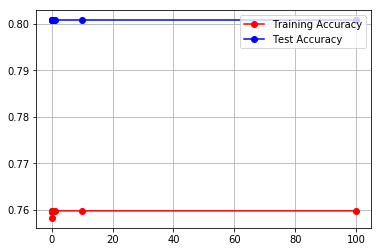

In [166]:
acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

#age, workclass, education.num, marital.status, occupation, relationship,race,sex,capital.gain,capital.loss,hours.per.week vs income
X = df1.iloc[:,0:11]
Y = df1.iloc[:,-1]
# display(X)
# display(Y)

X_train = X[0:15081]
Y_train = Y[0:15081]
X_test = X[15081:]
Y_test = Y[15081:]

for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Logistic Regression Using Polynomial Feature Transformation

In [167]:
poly = PolynomialFeatures(degree=2)

In [168]:
#Occupation vs income
X = df1.iloc[:,4:5]
Y = df1.iloc[:,-1]
# display(X)
# display(Y)

X_train = X[0:15081]
Y_train = Y[0:15081]
X_test = X[15081:]
Y_test = Y[15081:]

X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

In [169]:
X_transformed_train.shape
X_transformed_test.shape

(15081, 3)

Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.701346
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809


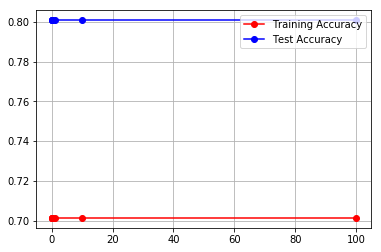

In [170]:
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []
# Call the function logreg_model.
for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809
Accuracy on training data = 0.701346
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

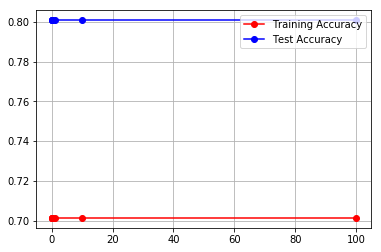

In [171]:
# Calling the logreg2_model(..) using transformed features.
# Pass c, X_transformed_train , Y_train, X_transformed_test, Y_test
# Before calling the function, we need to re-initialize the 3 lists in which we append the 
# results (accuracy) beacause these list are global varibles.
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []
# Call the function logreg2_model.
for c in cVals:
    logreg2_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.705855
Accuracy on test data = 0.768716


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.757244
Accuracy on test data = 0.805318


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759764
Accuracy on test data = 0.809098


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759764
Accuracy on test data = 0.808832


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759631
Accuracy on test data = 0.808832


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.759631
Accuracy on test data = 0.808899
Accuracy on training data = 0.759631
Accuracy on test data = 0.808965


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


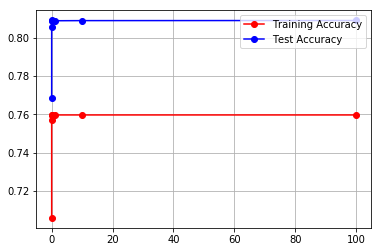

In [172]:
#age, workclass, education.num, marital.status, occupation vs income
X = df1.iloc[:,0:5]
Y = df1.iloc[:,-1]
# display(X)
# display(Y)

X_train = X[0:15081]
Y_train = Y[0:15081]
X_test = X[15081:]
Y_test = Y[15081:]

X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

acc_train_logreg = []
acc_test_logreg = []
c_logreg = []
# Call the function logreg_model.
for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training data = 0.786685
Accuracy on test data = 0.834825
Accuracy on training data = 0.790929
Accuracy on test data = 0.836748


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training data = 0.794045
Accuracy on test data = 0.836350


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training data = 0.794178
Accuracy on test data = 0.837743


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training data = 0.794642
Accuracy on test data = 0.837610


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training data = 0.796963
Accuracy on test data = 0.838207


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training data = 0.794510
Accuracy on test data = 0.837279


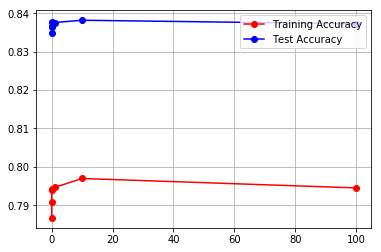

In [173]:
# Calling the logreg2_model(..) using transformed features.
# Pass c, X_transformed_train , Y_train, X_transformed_test, Y_test
# Before calling the function, we need to re-initialize the 3 lists in which we append the 
# results (accuracy) beacause these list are global varibles.
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []
# Call the function logreg2_model.
for c in cVals:
    logreg2_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809
Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


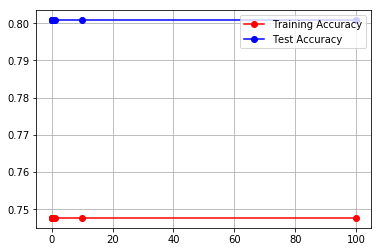

In [174]:
#age, workclass, education.num, marital.status, occupation, relationship,race,sex,capital.gain,capital.loss,hours.per.week vs income
X = df1.iloc[:,0:11]
Y = df1.iloc[:,-1]
# display(X)
# display(Y)

X_train = X[0:15081]
Y_train = Y[0:15081]
X_test = X[15081:]
Y_test = Y[15081:]

X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

acc_train_logreg = []
acc_test_logreg = []
c_logreg = []
# Call the function logreg_model.
for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg, acc_train_logreg, 'ro-') 
plt.plot(c_logreg, acc_test_logreg,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809
Accuracy on training data = 0.747696
Accuracy on test data = 0.800809
Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809
Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training data = 0.747696
Accuracy on test data = 0.800809
Accuracy on training data = 0.747696
Accuracy on test data = 0.800809


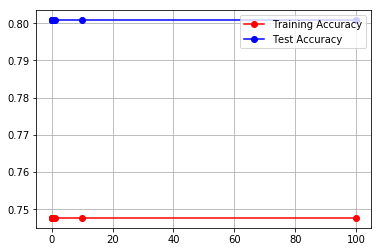

In [175]:
# Calling the logreg2_model(..) using transformed features.
# Pass c, X_transformed_train , Y_train, X_transformed_test, Y_test
# Before calling the function, we need to re-initialize the 3 lists in which we append the 
# results (accuracy) beacause these list are global varibles.
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []
# Call the function logreg2_model.
for c in cVals:
    logreg2_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Neural Network

# Unscaled Sigmoid

In [176]:
import keras
import tensorflow as tf
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r # We will randomly initialize our weights

from keras.models import Model, Sequential
from keras.layers import Dense, Activation

In [177]:
X = np.array(df1.iloc[:,:11])
Y = np.array(df1.iloc[:,-1]).reshape(np.array(df1.iloc[:,-1]).shape[0],1)
print(X.shape)
print(Y)

(30162, 11)
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [178]:
# Split the data into training and test set.  60% training and %40 test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

print(X_train.shape)

(18097, 11)


In [179]:
model = keras.Sequential()

model.add(Dense(output_dim=9, activation='sigmoid', input_dim=11))
model.add(Dense(output_dim=1, activation='sigmoid', input_dim=9))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


/Users/derrick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=11, units=9)`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/derrick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=9, units=1)`
  after removing the cwd from sys.path.


In [180]:
training_model = model.fit(X_train, Y_train, nb_epoch=50, batch_size=1810, validation_data=(X_test,Y_test),verbose=1)

/Users/derrick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 0s 26us/step - loss: 1.1086 - acc: 0.2479 - val_loss: 1.0647 - val_acc: 0.2482
Epoch 2/50
18097/18097 [==============================] - 0s 2us/step - loss: 1.0432 - acc: 0.2468 - val_loss: 1.0160 - val_acc: 0.2482
Epoch 3/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.9979 - acc: 0.2468 - val_loss: 0.9736 - val_acc: 0.2482
Epoch 4/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.9560 - acc: 0.2468 - val_loss: 0.9312 - val_acc: 0.2482
Epoch 5/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.9137 - acc: 0.2468 - val_loss: 0.8892 - val_acc: 0.2482
Epoch 6/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.8701 - acc: 0.2468 - val_loss: 0.8445 - val_acc: 0.2482
Epoch 7/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.8269 - acc: 0.2553 - val_loss: 0.8029 - val_acc: 0.28

In [181]:
results = model.evaluate(X_test, Y_test)
print(results)

12065/12065 [==============================] - 0s 11us/step
[0.47165964181078357, 0.7924575217571488]


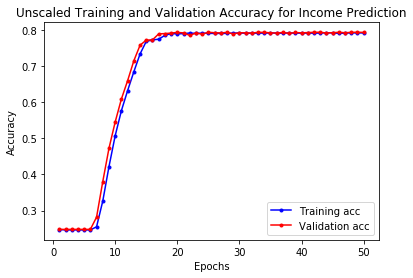

In [182]:
acc = training_model.history['acc']
value_acc = training_model.history['val_acc']
num_epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(num_epochs, acc, 'b.-', label='Training acc')
plt.plot(num_epochs, value_acc, 'r.-', label='Validation acc')
plt.title('Unscaled Training and Validation Accuracy for Income Prediction')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Unscaled L1 Regularization

/Users/derrick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=11, units=9)`
  """
/Users/derrick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=9, units=1)`
  
/Users/derrick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 1s 44us/step - loss: 0.8170 - acc: 0.2446 - val_loss: 0.7969 - val_acc: 0.2431
Epoch 2/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.7826 - acc: 0.2555 - val_loss: 0.7690 - val_acc: 0.2705
Epoch 3/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.7568 - acc: 0.3029 - val_loss: 0.7449 - val_acc: 0.3454
Epoch 4/50
18097/18097 [==============================] - 

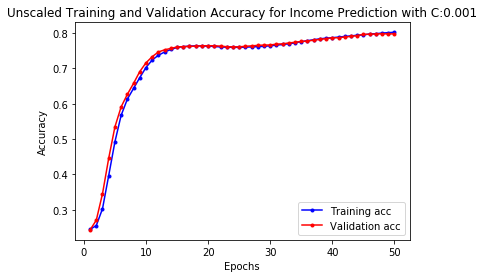

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 1s 47us/step - loss: 0.6204 - acc: 0.7290 - val_loss: 0.6089 - val_acc: 0.7387
Epoch 2/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.6023 - acc: 0.7464 - val_loss: 0.5945 - val_acc: 0.7503
Epoch 3/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.5891 - acc: 0.7537 - val_loss: 0.5822 - val_acc: 0.7565
Epoch 4/50
18097/18097 [==============================] - 

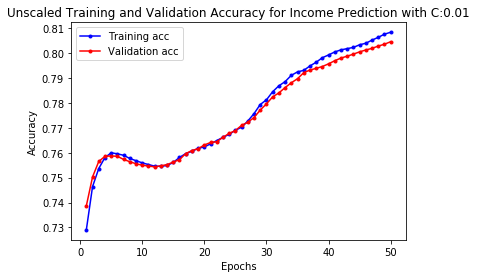

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 1s 52us/step - loss: 0.7040 - acc: 0.4957 - val_loss: 0.6873 - val_acc: 0.5343
Epoch 2/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.6775 - acc: 0.5577 - val_loss: 0.6659 - val_acc: 0.5850
Epoch 3/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.6577 - acc: 0.6096 - val_loss: 0.6474 - val_acc: 0.6346
Epoch 4/50
18097/18097 [==============================] - 

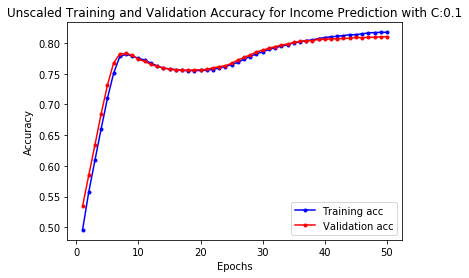

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 1s 55us/step - loss: 0.7977 - acc: 0.2609 - val_loss: 0.7772 - val_acc: 0.2734
Epoch 2/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.7644 - acc: 0.3007 - val_loss: 0.7501 - val_acc: 0.3339
Epoch 3/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.7392 - acc: 0.3641 - val_loss: 0.7266 - val_acc: 0.3961
Epoch 4/50
18097/18097 [==============================] - 

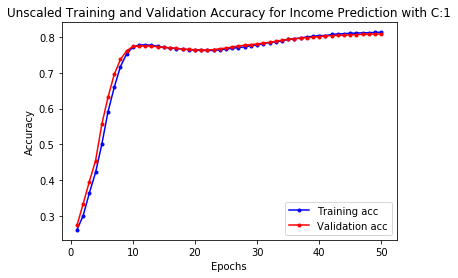

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 1s 56us/step - loss: 0.6374 - acc: 0.7357 - val_loss: 0.6223 - val_acc: 0.7510
Epoch 2/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.6165 - acc: 0.7494 - val_loss: 0.6058 - val_acc: 0.7522
Epoch 3/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.6013 - acc: 0.7503 - val_loss: 0.5919 - val_acc: 0.7523
Epoch 4/50
18097/18097 [==============================] - 

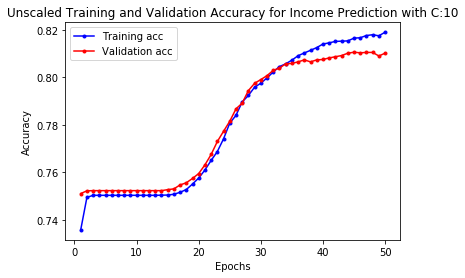

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 1s 58us/step - loss: 0.7276 - acc: 0.3917 - val_loss: 0.7099 - val_acc: 0.4514
Epoch 2/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.6990 - acc: 0.4964 - val_loss: 0.6866 - val_acc: 0.5483
Epoch 3/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.6773 - acc: 0.5843 - val_loss: 0.6665 - val_acc: 0.6270
Epoch 4/50
18097/18097 [==============================] - 

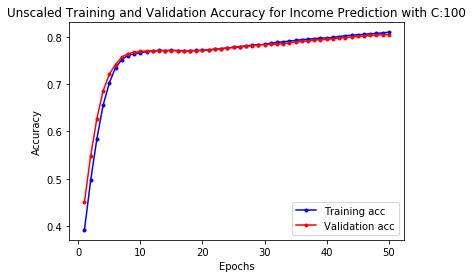

In [192]:
cVals = [0.001, 0.01, 0.1, 1, 10, 100]
for c in cVals:
    model = keras.Sequential()

    model.add(Dense(output_dim=9, activation='sigmoid', input_dim=11))
    model.add(Dense(output_dim=1, activation='sigmoid', input_dim=9))

    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

    model.summary()
                 
    training_model = model.fit(X_train, Y_train, nb_epoch=50, batch_size=1810, validation_data=(X_test,Y_test),verbose=1)
    
    results = model.evaluate(X_test, Y_test)
    print(results)

    acc = training_model.history['acc']
    value_acc = training_model.history['val_acc']
    num_epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(num_epochs, acc, 'b.-', label='Training acc')
    plt.plot(num_epochs, value_acc, 'r.-', label='Validation acc')
    plt.title('Unscaled Training and Validation Accuracy for Income Prediction with C:{}'.format(c))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Sigmoid Scaled

In [185]:
X_scale = StandardScaler()
X = X_scale.fit_transform(X)

X[0,:] # Looking the new features after scaling

/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/derrick/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([ 3.31662977, -0.20895464, -0.4397382 ,  2.28296868, -0.73454534,
       -0.26124893,  0.3850479 , -1.44340518, -0.14744462, 10.55581365,
       -1.91416096])

In [186]:
# Split the data into training and test set.  60% training and %40 test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

print(X_train.shape)

(18097, 11)


In [187]:
model = keras.Sequential()

model.add(Dense(output_dim=9, activation='sigmoid', input_dim=11))
model.add(Dense(output_dim=1, activation='sigmoid', input_dim=9))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


/Users/derrick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=11, units=9)`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/derrick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=9, units=1)`
  after removing the cwd from sys.path.


In [188]:
training_model = model.fit(X_train, Y_train, nb_epoch=50, batch_size=1810, validation_data=(X_test,Y_test),verbose=1)

/Users/derrick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 1s 37us/step - loss: 0.7503 - acc: 0.3890 - val_loss: 0.7310 - val_acc: 0.4211
Epoch 2/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.7181 - acc: 0.4480 - val_loss: 0.7050 - val_acc: 0.4773
Epoch 3/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.6940 - acc: 0.5113 - val_loss: 0.6825 - val_acc: 0.5428
Epoch 4/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.6725 - acc: 0.5782 - val_loss: 0.6618 - val_acc: 0.6089
Epoch 5/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.6525 - acc: 0.6443 - val_loss: 0.6426 - val_acc: 0.6729
Epoch 6/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.6339 - acc: 0.6981 - val_loss: 0.6245 - val_acc: 0.7165
Epoch 7/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.6165 - acc: 0.7348 - val_loss: 0.6076 - val_acc: 0.74

In [189]:
results = model.evaluate(X_test, Y_test)
print(results)

12065/12065 [==============================] - 0s 12us/step
[0.40783849338550465, 0.8094488188976378]


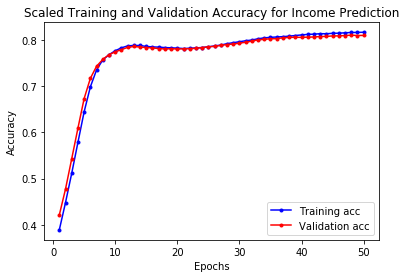

In [190]:
acc = training_model.history['acc']
value_acc = training_model.history['val_acc']
num_epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(num_epochs, acc, 'b.-', label='Training acc')
plt.plot(num_epochs, value_acc, 'r.-', label='Validation acc')
plt.title('Scaled Training and Validation Accuracy for Income Prediction')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Scaled L1 Regularization 

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


/Users/derrick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=11, units=9)`
  after removing the cwd from sys.path.
/Users/derrick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=9, units=1)`
  """
/Users/derrick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 1s 43us/step - loss: 1.0085 - acc: 0.2514 - val_loss: 0.9829 - val_acc: 0.2498
Epoch 2/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.9622 - acc: 0.2535 - val_loss: 0.9451 - val_acc: 0.2525
Epoch 3/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.9266 - acc: 0.2582 - val_loss: 0.9115 - val_acc: 0.2581
Epoch 4/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.8943 - acc: 0.2651 - val_loss: 0.8803 - val_acc: 0.2694
Epoch 5/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.8638 - acc: 0.2827 - val_loss: 0.8506 - val_acc: 0.2956
Epoch 6/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.8348 - acc: 0.3117 - val_loss: 0.8223 - val_acc: 0.3289
Epoch 7/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.8071 - acc: 0.3428 - val_loss: 0.7953 - val_acc: 0.36

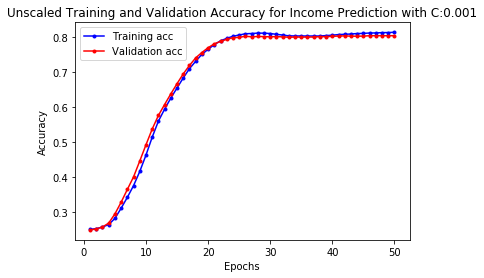

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 1s 38us/step - loss: 0.5595 - acc: 0.7668 - val_loss: 0.5504 - val_acc: 0.7653
Epoch 2/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.5457 - acc: 0.7620 - val_loss: 0.5396 - val_acc: 0.7626
Epoch 3/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.5359 - acc: 0.7595 - val_loss: 0.5307 - val_acc: 0.7610
Epoch 4/50
18097/18097 [==============================] - 

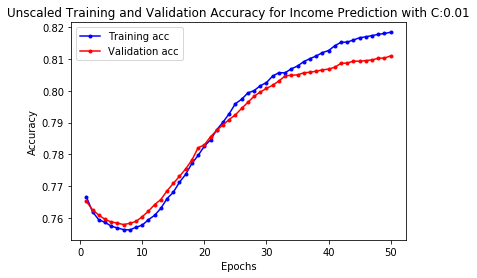

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 1s 40us/step - loss: 0.6723 - acc: 0.6267 - val_loss: 0.6581 - val_acc: 0.6882
Epoch 2/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.6488 - acc: 0.7117 - val_loss: 0.6392 - val_acc: 0.7298
Epoch 3/50
18097/18097 [==============================] - 0s 1us/step - loss: 0.6313 - acc: 0.7386 - val_loss: 0.6229 - val_acc: 0.7481
Epoch 4/50
18097/18097 [==============================] - 

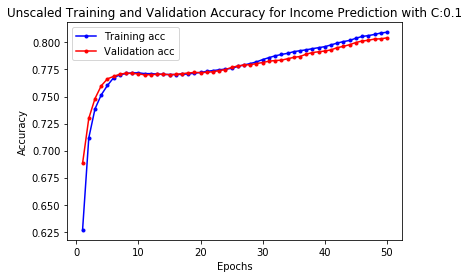

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 1s 41us/step - loss: 0.5722 - acc: 0.7503 - val_loss: 0.5633 - val_acc: 0.7523
Epoch 2/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.5615 - acc: 0.7503 - val_loss: 0.5550 - val_acc: 0.7523
Epoch 3/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.5535 - acc: 0.7503 - val_loss: 0.5477 - val_acc: 0.7523
Epoch 4/50
18097/18097 [==============================] - 

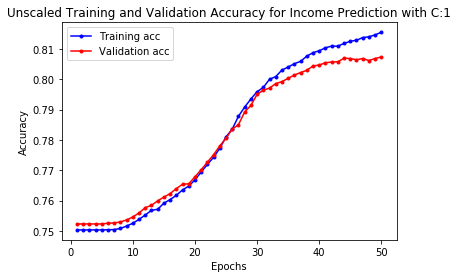

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 1s 47us/step - loss: 0.6270 - acc: 0.7360 - val_loss: 0.6146 - val_acc: 0.7470
Epoch 2/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.6095 - acc: 0.7481 - val_loss: 0.6008 - val_acc: 0.7518
Epoch 3/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.5968 - acc: 0.7503 - val_loss: 0.5890 - val_acc: 0.7523
Epoch 4/50
18097/18097 [==============================] - 

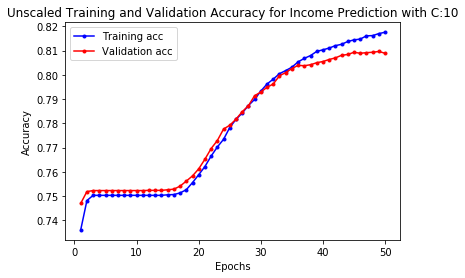

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
Train on 18097 samples, validate on 12065 samples
Epoch 1/50
18097/18097 [==============================] - 1s 43us/step - loss: 0.6609 - acc: 0.6517 - val_loss: 0.6468 - val_acc: 0.6831
Epoch 2/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.6394 - acc: 0.7021 - val_loss: 0.6297 - val_acc: 0.7271
Epoch 3/50
18097/18097 [==============================] - 0s 2us/step - loss: 0.6237 - acc: 0.7338 - val_loss: 0.6151 - val_acc: 0.7451
Epoch 4/50
18097/18097 [==============================] - 

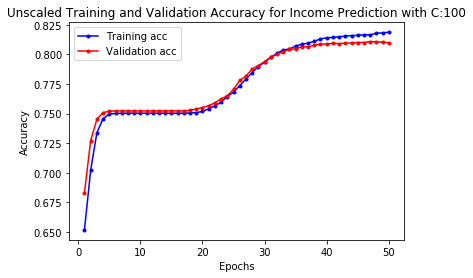

In [191]:
for c in cVals:
    model = keras.Sequential()

    model.add(Dense(output_dim=9, activation='sigmoid', input_dim=11))
    model.add(Dense(output_dim=1, activation='sigmoid', input_dim=9))

    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

    model.summary()
                 
    training_model = model.fit(X_train, Y_train, nb_epoch=50, batch_size=1810, validation_data=(X_test,Y_test),verbose=1)
    
    results = model.evaluate(X_test, Y_test)
    print(results)

    acc = training_model.history['acc']
    value_acc = training_model.history['val_acc']
    num_epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(num_epochs, acc, 'b.-', label='Training acc')
    plt.plot(num_epochs, value_acc, 'r.-', label='Validation acc')
    plt.title('Unscaled Training and Validation Accuracy for Income Prediction with C:{}'.format(c))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()